# Задания

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Задание 1: Создайте и заполните таблицу запросами, создайте техническое поле ID c параметрами INTEGER PRIMARY KEY AUTOINCREMENT.

In [3]:
con = sqlite3.connect('works.sqlite')
cursor = con.cursor()
cursor.execute('drop table if exists works')
cursor.execute('create table if not exists works (ID INTEGER PRIMARY KEY AUTOINCREMENT, salary INTEGER, educationType TEXT,'
              'jobTitle TEXT, qualification TEXT, gender TEXT, dateModify TEXT,skills TEXT,otherInfo TEXT)')

In [4]:
cursor.execute('pragma table_info(works)').fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'educationType', 'TEXT', 0, None, 0),
 (3, 'jobTitle', 'TEXT', 0, None, 0),
 (4, 'qualification', 'TEXT', 0, None, 0),
 (5, 'gender', 'TEXT', 0, None, 0),
 (6, 'dateModify', 'TEXT', 0, None, 0),
 (7, 'skills', 'TEXT', 0, None, 0),
 (8, 'otherInfo', 'TEXT', 0, None, 0)]

In [5]:
df = pd.read_csv("works.csv")
df.to_sql("works", con, if_exists='append', index=False)
cursor.execute('select * from works limit 5').fetchall()

[(1,
  60000,
  'Высшее',
  'Специалист пресс-службы',
  'Магистр',
  'Мужской',
  '2021-04-01',
  '<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',
  None),
 (2,
  85000,
  'Высшее',
  'менеджер проектов',
  None,
  'Мужской',
  '2021-04-01',
  None,
  None),
 (3,
  15000,
  'Среднее профессиональное',
  '....',
  None,
  'Женский',
  '2021-06-01',
  None,
  None),
 (4, 30000, None, None, None, 'Женский', '2021-04-03', None, None),
 (5, 45000, None, None, None, 'Мужской', '2021-06-28', None, None)]

## Задание 2: Добавьте индекс на поле salary. Изменится ли после этого размер файла? На сколько?

In [6]:
# до 6,19
cursor.execute('create index salary_index on works(salary)')
# после 6,52
# увеличилось на 0,33мб

## Задание 3: Выведите количество записей.

In [7]:
cursor.execute('select count(*) from works').fetchall()[0][0]

32683

## Задание 4: Выведите количество мужчин и женщин.

In [8]:
cursor.execute('select count(*) from works where gender="Женский"').fetchall()[0][0]

17910

In [9]:
cursor.execute('select count(*) from works where gender="Мужской"').fetchall()[0][0]

13386

## Задание 5: У скольки записей заполены skills?

In [10]:
cursor.execute('select count(*) from works where skills not null').fetchall()[0][0]

8972

## Задание 6: Получить заполненные скиллы.

In [11]:
cursor.execute('select skills from works where skills not null limit 3').fetchall()

[('<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',),
 ('Ответственная,пунктуальная,дисциплинированная я,стрессоустойчивая,легкообучаема ,технически оснащена',),
 ('<p>Коммуникабельность&nbsp;</p>',)]

## Задание 7: Вывести зарплату только у тех, у кого в скилах есть Python.

In [12]:
cursor.execute('select salary from works where skills like "%Python%"').fetchall()

[(35000,),
 (20000,),
 (35000,),
 (15000,),
 (25000,),
 (90000,),
 (30000,),
 (50000,),
 (23000,),
 (23000,)]

## Задание 8: Построить перцентили и разброс по з/п у мужчин и женщин.

In [13]:
men = cursor.execute('SELECT salary FROM works where gender = "Мужской"').fetchall()
salaryMen = []
for i in men:
    salaryMen.append(i[0])
np.quantile(salaryMen, np.linspace(.1, 1, 10))

array([  15000.,   20000.,   25000.,   30000.,   30000.,   35000.,
         40000.,   50000.,   60000., 1000000.])

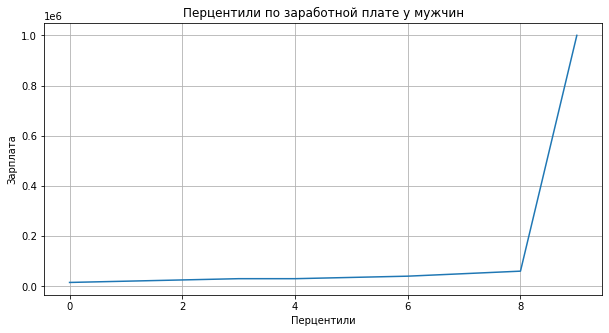

In [14]:
plt.figure(figsize=(10, 5))
plt.title('Перцентили по заработной плате у мужчин')
plt.xlabel('Перцентили')
plt.ylabel('Зарплата')
plt.grid()
plt.plot(np.quantile(salaryMen, np.linspace(.1, 1, 10)))
plt.show()

In [15]:
wom = cursor.execute('SELECT salary FROM works where gender = "Женский"').fetchall()
salaryWom = []
for i in wom:
    salaryWom.append(i[0])
np.quantile(salaryWom, np.linspace(.1, 1, 10))

array([ 15000.,  18000.,  20000.,  22000.,  25000.,  30000.,  30000.,
        35000.,  47000., 900000.])

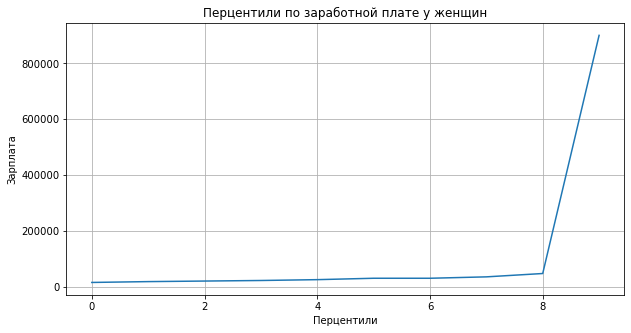

In [16]:
plt.figure(figsize=(10, 5))
plt.title('Перцентили по заработной плате у женщин')
plt.xlabel('Перцентили')
plt.ylabel('Зарплата')
plt.grid()
plt.plot(np.quantile(salaryWom, np.linspace(.1, 1, 10)))
plt.show()

## Задание 9: Построить графики распределения по з/п мужчин и женщин в зависимости от высшего образования.

### распределения по з/п мужчин

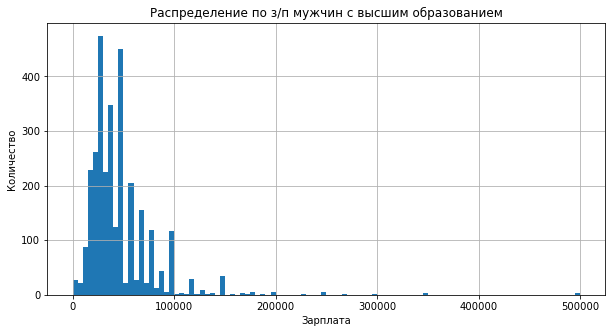

In [17]:
men = np.asarray(cursor.execute("select salary from works where gender='Мужской' and educationType='Высшее'").fetchall())
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по з/п мужчин с высшим образованием') 
plt.xlabel('Зарплата') 
plt.ylabel('Количество') 
plt.grid() 

plt.hist(men, 
         bins=100) 
plt.show()

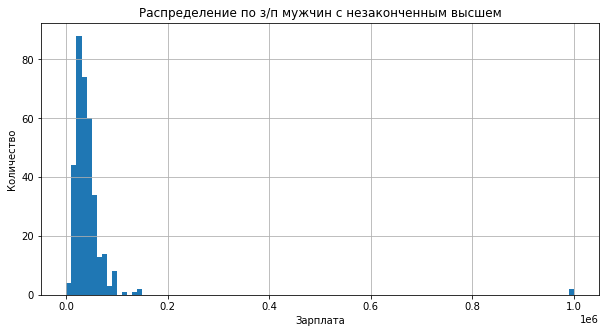

In [18]:
men = np.asarray(cursor.execute("select salary from works where gender='Мужской' and educationType='Незаконченное высшее'").fetchall())
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по з/п мужчин с незаконченным высшем') 
plt.xlabel('Зарплата') 
plt.ylabel('Количество') 
plt.grid() 

plt.hist(men, 
         bins=100) 
plt.show()

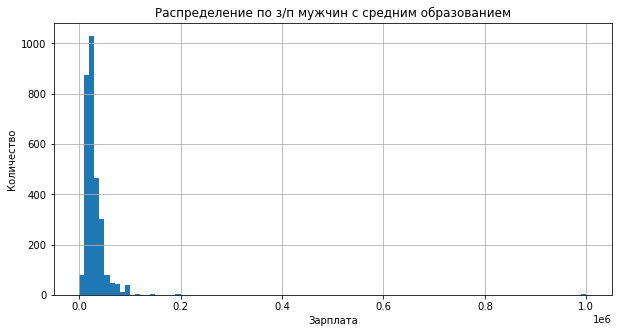

In [19]:
men = np.asarray(cursor.execute("select salary from works where gender='Мужской' and educationType='Среднее'").fetchall())
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по з/п мужчин с средним образованием') 
plt.xlabel('Зарплата') 
plt.ylabel('Количество') 
plt.grid() 

plt.hist(men, 
         bins=100) 
plt.show()

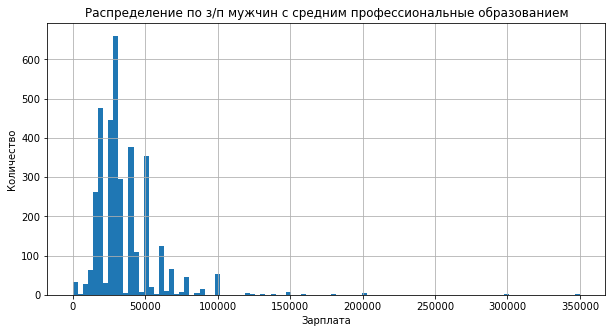

In [20]:
men = np.asarray(cursor.execute("select salary from works where gender='Мужской' and educationType='Среднее профессиональное'").fetchall())
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по з/п мужчин с средним профессиональные образованием') 
plt.xlabel('Зарплата') 
plt.ylabel('Количество') 
plt.grid() 

plt.hist(men, 
         bins=100) 
plt.show()

### распределения по з/п женщин

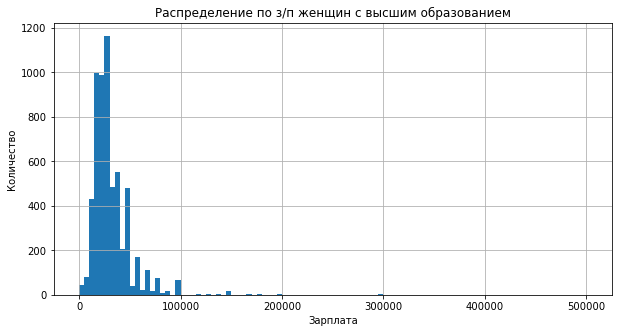

In [21]:
wom = np.asarray(cursor.execute("select salary from works where gender='Женский' and educationType='Высшее'").fetchall())
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по з/п женщин с высшим образованием') 
plt.xlabel('Зарплата') 
plt.ylabel('Количество') 
plt.grid() 

plt.hist(wom, 
         bins=100) 
plt.show()

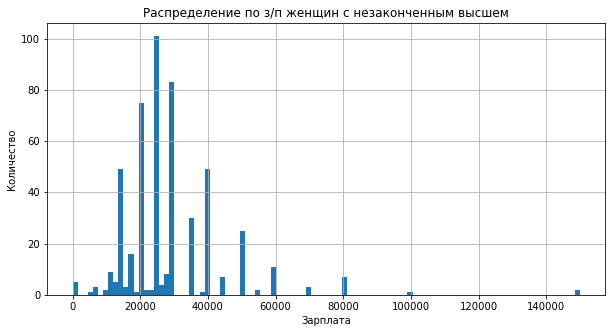

In [22]:
wom = np.asarray(cursor.execute("select salary from works where gender='Женский' and educationType='Незаконченное высшее'").fetchall())
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по з/п женщин с незаконченным высшем') 
plt.xlabel('Зарплата') 
plt.ylabel('Количество') 
plt.grid() 

plt.hist(wom, 
         bins=100) 
plt.show()

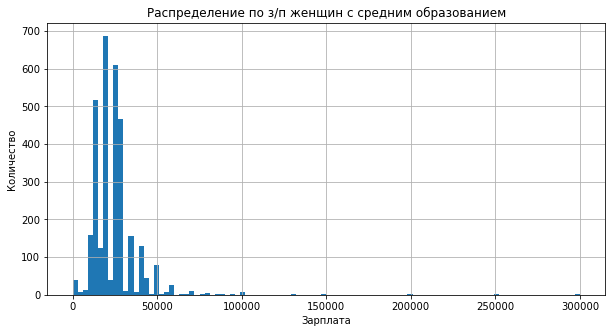

In [23]:
wom = np.asarray(cursor.execute("select salary from works where gender='Женский' and educationType='Среднее'").fetchall())
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по з/п женщин с средним образованием') 
plt.xlabel('Зарплата') 
plt.ylabel('Количество') 
plt.grid() 

plt.hist(wom, 
         bins=100) 
plt.show()

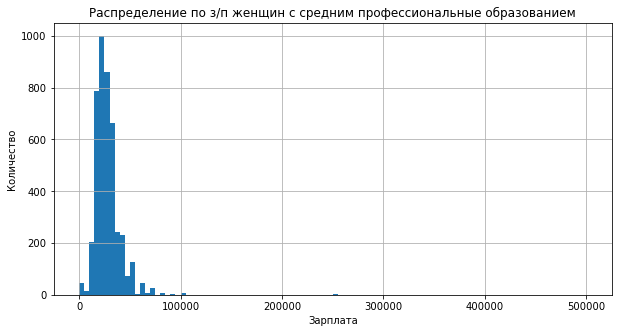

In [24]:
wom = np.asarray(cursor.execute("select salary from works where gender='Женский' and educationType='Среднее профессиональное'").fetchall())
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по з/п женщин с средним профессиональные образованием') 
plt.xlabel('Зарплата') 
plt.ylabel('Количество') 
plt.grid() 

plt.hist(wom, 
         bins=100) 
plt.show()

# ДЗ

## Пробуем нормализовать базу данных и немного почистить поля.
Выделим отдельные сущности:

### Создайте отдельную таблицу с гендером, заполните ее значениями, сделайте на нее внешний ключ из таблицы works.

In [25]:
# создание таблицы
cursor.execute("create table if not exists genders (ID INTEGER PRIMARY KEY AUTOINCREMENT, gender TEXT)")
cursor.execute('pragma table_info(genders)').fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1), (1, 'gender', 'TEXT', 0, None, 0)]

In [26]:
# добавление внешнего ключа
cursor.execute('insert into genders(gender) select distinct gender from works where gender is not null')
cursor.execute('alter table works add column id_gend INTEGER REFERENCES genders(ID)')

In [27]:
# изменение в works гендера на код
cursor.execute('UPDATE works SET id_gend = (SELECT ID FROM genders WHERE gender = works.gender)')

In [28]:
# удаление столбца гендера
cursor.execute('ALTER TABLE works DROP COLUMN gender')

In [29]:
cursor.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'educationType', 'TEXT', 0, None, 0),
 (3, 'jobTitle', 'TEXT', 0, None, 0),
 (4, 'qualification', 'TEXT', 0, None, 0),
 (5, 'dateModify', 'TEXT', 0, None, 0),
 (6, 'skills', 'TEXT', 0, None, 0),
 (7, 'otherInfo', 'TEXT', 0, None, 0),
 (8, 'id_gend', 'INTEGER', 0, None, 0)]

In [30]:
cursor.execute("SELECT * FROM genders").fetchall()

[(1, 'Мужской'), (2, 'Женский')]

In [31]:
cursor.execute('SELECT id_gend FROM works limit 5').fetchall()

[(1,), (1,), (2,), (2,), (1,)]

### Отдельная таблица для образования.

In [32]:
cursor.execute("create table if not exists education (ID INTEGER PRIMARY KEY AUTOINCREMENT, educationType TEXT)")
cursor.execute('insert into education(educationType) select distinct educationType from works where educationType is not null')
cursor.execute('alter table works add column id_educ INTEGER REFERENCES education(ID)')
cursor.execute('UPDATE works SET id_educ = (SELECT ID FROM education WHERE educationType = works.educationType)')
cursor.execute('ALTER TABLE works DROP COLUMN educationType')

In [33]:
cursor.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'jobTitle', 'TEXT', 0, None, 0),
 (3, 'qualification', 'TEXT', 0, None, 0),
 (4, 'dateModify', 'TEXT', 0, None, 0),
 (5, 'skills', 'TEXT', 0, None, 0),
 (6, 'otherInfo', 'TEXT', 0, None, 0),
 (7, 'id_gend', 'INTEGER', 0, None, 0),
 (8, 'id_educ', 'INTEGER', 0, None, 0)]

In [34]:
cursor.execute("SELECT * FROM education").fetchall()

[(1, 'Высшее'),
 (2, 'Среднее профессиональное'),
 (3, 'Среднее'),
 (4, 'Незаконченное высшее')]

In [35]:
cursor.execute('SELECT id_educ FROM works limit 5').fetchall()

[(1,), (1,), (2,), (None,), (None,)]

## Скилы и otherInfo
Эти поля крайне засорены HTML-разметкой. 

### Очистите эти поля от HTML.

In [36]:
import re

In [37]:
works_new = cursor.execute("SELECT ID, skills, otherInfo FROM works").fetchall()
clear = []
for id, skills, other_info in works_new:
    if skills is not None:
        #замена лишних символов на пробел(иначе могут сливаться слова)
        skills = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', ' ', skills) 
        #замена подряд идущих пробелов на один
        skills = re.sub(r'[  ]+', ' ', skills) 
        # удаление пробела начале и в конце
        skills = skills.strip()
    if other_info is not None:   
        other_info = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', ' ', other_info)
        other_info = re.sub(r'[  ]+', ' ', other_info)
        other_info = other_info.strip()
    clear.append((skills, other_info, id))
cursor.executemany("UPDATE works SET skills = ?, otherInfo = ? WHERE ID = ?", clear)

In [38]:
cursor.execute("SELECT * FROM works limit 3").fetchall()

[(1,
  60000,
  'Специалист пресс-службы',
  'Магистр',
  '2021-04-01',
  'Аналитическое мышление, ответственность, стабильность психологического состояния и настроения.',
  None,
  1,
  1),
 (2, 85000, 'менеджер проектов', None, '2021-04-01', None, None, 1, 1),
 (3, 15000, '....', None, '2021-06-01', None, None, 2, 2)]